In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

seed =1234

In [3]:
pd.set_option('display.max_rows', 10, 'display.max_columns', 500, 'max_colwidth', None)


In [4]:
# df = pd.read_csv('./kospi.csv')
df = pd.read_csv('./baseline_hv.csv')

df.shape

(4598, 55)

In [5]:
df.head()

,date,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.isna().sum()

date           0
baseline       0
HV             1
HV_pred       20
HV_resid      21
              ..
ADOSC          0
Volume_OSC     0
upperband      0
middleband     0
lowerband      0
Length: 55, dtype: int64

In [7]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [8]:
df.head()

,date,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
0,2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.set_index('date', inplace=True)

In [10]:
df.head()

,baseline,HV,HV_pred,HV_resid,sum_word,MA5,MA20,MA60,MA120,MA5_gra,MA20_gra,MA60_gra,MA120_gra,V_MA5,V_MA20,V_MA60,V_MA120,EMA5,EMA20,EMA60,EMA120,MACD,MACD_sig9,MACD_OSC,Fast%K,Fast%D,Slow%K,Slow%D,RSI14,RSI signal,CCI,A_Ratio,B_Ratio,ATR,UpDI,DownDI,MFI,Momentum,Sonar,Sonar_sig5,STDEV,Sigma,TRIX,VR,WILLR,Psy,Disparity20,Disparity60,ADX,ADOSC,Volume_OSC,upperband,middleband,lowerband
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-07-28,100.0,NaN,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-29,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-30,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-31,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-08-01,100.0,0.0,0.0,0.0,3.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.291079e+07,0.0,0.0,0.0,41.088806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df['sum_word']=df['sum_word']+1

In [12]:
df.shape

(4598, 54)

In [13]:
cols = ['HV', 'sum_word','MACD']#, 'MACD_OSC', 'Sonar', 'Sigma', 'Momentum', 'Volume_OSC',  'ATR','RSI signal','RSI14',  'ADOSC']
cols


['HV', 'sum_word', 'MACD']

In [14]:
df = df[cols]

In [15]:
df.index

Index(['2003-07-28', '2003-07-29', '2003-07-30', '2003-07-31', '2003-08-01',
       '2003-08-04', '2003-08-05', '2003-08-06', '2003-08-07', '2003-08-08',
       ...
       '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
       '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28'],
      dtype='object', name='date', length=4598)

In [16]:
df.head()

,HV,sum_word,MACD
date,,,
2003-07-28,NaN,1.0,0.0
2003-07-29,0.0,1.0,0.0
2003-07-30,0.0,1.0,0.0
2003-07-31,0.0,1.0,0.0
2003-08-01,0.0,4.0,0.0


In [17]:
# df_og = scaler.inverse_transform(df)
# df_og_df = pd.DataFrame(df_og, columns = cols, index = df.index)
# df_og_df.head()

In [18]:
df.shape

(4598, 3)

In [19]:
feature_df = df.loc['2003-09-29':'2021-09-28', 'HV':'MACD']
print(feature_df.shape)
feature_df.head()

(4532, 3)


,HV,sum_word,MACD
date,,,
2003-09-29,0.000000,1.0,0.115163
2003-09-30,0.046147,1.0,0.033484
2003-10-01,0.111621,1.0,0.050163
2003-10-02,0.113955,1.0,0.080961
2003-10-03,0.127419,1.0,0.150613


In [20]:
label_df = df.loc['2003-09-29':'2021-09-28', 'HV']
print(label_df.shape)
label_df.head()

(4532,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

# TRAIN, TEST 분리
- 1차 : 2003 ~ 2011 학습 / 2012 ~ 2016 예측
- 2차 : 2003 ~ 2016 학습 / 2017~ 2021 예측

## 1차 train_test 분리

In [21]:
X_train_1st = feature_df.loc['2003-09-29':'2011-10-28']
print(X_train_1st.shape)
X_train_1st.head()

(2038, 3)


,HV,sum_word,MACD
date,,,
2003-09-29,0.000000,1.0,0.115163
2003-09-30,0.046147,1.0,0.033484
2003-10-01,0.111621,1.0,0.050163
2003-10-02,0.113955,1.0,0.080961
2003-10-03,0.127419,1.0,0.150613


In [22]:
y_train_1st = label_df.loc['2003-09-29':'2011-10-28']
print(y_train_1st.shape)
y_train_1st.head()

(2038,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

### test

In [23]:
X_test_1st = feature_df.loc['2011-09-29':'2021-09-28']
print(X_test_1st.shape)
X_test_1st.head()

(2516, 3)


,HV,sum_word,MACD
date,,,
2011-09-29,0.311156,25.0,-0.859632
2011-09-30,0.324805,13.0,-0.981205
2011-10-03,0.327470,11.5,-1.202298
2011-10-04,0.340938,43.0,-1.250259
2011-10-05,0.327492,22.0,-1.187766


In [24]:
y_test_1st = label_df.loc['2011-09-29':'2021-09-28']
print(y_test_1st.shape)
y_test_1st.head()

(2516,)


date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [25]:
print(X_train_1st.shape, y_train_1st.shape)
print(X_test_1st.shape, y_test_1st.shape)

(2038, 3) (2038,)
(2516, 3) (2516,)


## scaling
X와 y를 각각 scaling 해주어야한다.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standardization 평균 0 / 분산 1
X_scaler = MinMaxScaler()
   
# df_1 = scaler.fit_transform(df)

# 교차검증시
X_scaler.fit(X_train_1st)
X_train_1st_sc = X_scaler.transform(X_train_1st)
X_test_1st_sc = X_scaler.transform(X_test_1st)

In [27]:
# from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
y_scaler = MinMaxScaler()   

# df_1 = scaler.fit_transform(df)

# 교차검증시
y_scaler.fit(np.array(y_train_1st).reshape(-1,1))
y_train_1st_sc = y_scaler.transform(np.array(y_train_1st).reshape(-1,1))
y_test_1st_sc = y_scaler.transform(np.array(y_test_1st).reshape(-1,1))

In [28]:
X_train_1st_sc.shape, X_test_1st_sc.shape, y_train_1st.shape, y_test_1st.shape

((2038, 3), (2516, 3), (2038,), (2516,))

In [29]:
y_train_1st.head()

date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

In [30]:
y_test_1st.head()

date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [31]:
y_test_1st.describe()

count    2516.000000
mean        0.144625
std         0.091794
min         0.046415
25%         0.094281
50%         0.120713
75%         0.165929
max         0.904255
Name: HV, dtype: float64

In [32]:
# df = pd.DataFrame(df_1, columns = cols, index = df.index)

In [33]:
X_train_1st_sc_df = pd.DataFrame(X_train_1st_sc, columns =X_train_1st.columns, index = X_train_1st.index)
X_train_1st_sc_df.head()

,HV,sum_word,MACD
date,,,
2003-09-29,0.000000,0.0,0.754183
2003-09-30,0.043094,0.0,0.739506
2003-10-01,0.104238,0.0,0.742503
2003-10-02,0.106417,0.0,0.748037
2003-10-03,0.118991,0.0,0.760554


In [34]:
X_test_1st_sc_df = pd.DataFrame(X_test_1st_sc, columns = X_test_1st.columns, index = X_test_1st.index)
X_test_1st_sc_df.head()

,HV,sum_word,MACD
date,,,
2011-09-29,0.290575,0.285714,0.579012
2011-09-30,0.303321,0.142857,0.557165
2011-10-03,0.305810,0.125000,0.517435
2011-10-04,0.318387,0.500000,0.508816
2011-10-05,0.305830,0.250000,0.520046


In [35]:
X_test_1st_sc_df.describe()

,HV,sum_word,MACD
count,2516.000000,2516.000000,2516.000000
mean,0.135059,0.081332,0.845592
std,0.085722,0.123893,0.290091
min,0.043345,0.000000,-1.759205
25%,0.088045,0.023810,0.736232
50%,0.112729,0.047619,0.857294
75%,0.154954,0.095238,0.955362
max,0.844444,2.357143,1.804111


In [36]:
# 딥러닝 학습을 위해 df -> numpy 변환
X_train_1st_np = X_train_1st_sc_df.to_numpy()
y_train_1st_np = y_train_1st.to_numpy()

X_test_1st_np = X_test_1st_sc_df.to_numpy()
y_test_1st_np = y_test_1st.to_numpy()

In [37]:
# 입력 파라미터 feature, label -> numpy type

def make_sequence_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = []  # 생성될 label list
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list) # 3차원으로 만들어줌

In [38]:
window_size = 20
X_train_1st, y_train_1st = make_sequence_dataset(X_train_1st_np, y_train_1st_np, window_size)
X_test_1st, y_test_1st = make_sequence_dataset(X_test_1st_np, y_test_1st_np, window_size)
print(X_train_1st.shape, y_train_1st.shape, X_test_1st.shape, y_test_1st.shape) # (batch size, time steps, input dims)

(2018, 20, 3) (2018,) (2496, 20, 3) (2496,)


# TRAIN, TEST 분리

In [39]:
# input_shape
X_train_1st[0].shape

(20, 3)

# Model

In [40]:
# model_116 = Sequential()
# model_116.add(LSTM(64, activation = 'relu', input_shape = X_train_1st[0].shape)) 
# # model_115.add(LSTM(16, activation = 'relu'))
# # model.add(LSTM(4, activation = 'relu',return_sequences=True))
# model_116.add(Dense(1))
# model_116.summary()

In [41]:
# Initialising the RNN
model_118 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True, input_shape = X_train_1st[0].shape))
model_118.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
model_118.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu', return_sequences = True))
model_118.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 10, activation = 'relu'))
model_118.add(Dropout(0.1))

# Adding the output layer
model_118.add(Dense(units = 1))
model_118.summary()
# Compiling the RNN
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 10)            560       
_________________________________________________________________
dropout (Dropout)            (None, 20, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 10)            840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 10)            840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                8

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# 출처: https://kibua20.tistory.com/206 [모바일 SW 개발자가 운영하는 블로그]
sgd = optimizers.SGD(learning_rate = 0.0001)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_118.compile(loss = 'mse', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model_118.fit(X_train_1st, y_train_1st, validation_data = (X_test_1st, y_test_1st), epochs=100, 
          batch_size=15, callbacks = [early_stop])

Epoch 1/100
135/135 [==============================] - 5s 19ms/step - loss: nan - val_loss: nan
Epoch 2/100
135/135 [==============================] - 2s 17ms/step - loss: nan - val_loss: nan
Epoch 3/100
135/135 [==============================] - 2s 17ms/step - loss: nan - val_loss: nan
Epoch 4/100
135/135 [==============================] - 2s 17ms/step - loss: nan - val_loss: nan
Epoch 5/100
135/135 [==============================] - 2s 17ms/step - loss: nan - val_loss: nan
Epoch 6/100
135/135 [==============================] - 2s 17ms/step - loss: nan - val_loss: nan
Epoch 7/100
135/135 [==============================] - 3s 20ms/step - loss: nan - val_loss: nan
Epoch 8/100
135/135 [==============================] - 3s 26ms/step - loss: nan - val_loss: nan
Epoch 9/100
135/135 [==============================] - 2s 18ms/step - loss: nan - val_loss: nan
Epoch 10/100
135/135 [==============================] - 3s 21ms/step - loss: nan - val_loss: nan


In [43]:
val_loss = history.history['val_loss']
print(val_loss[:5])

[nan, nan, nan, nan, nan]


In [44]:
train_loss = history.history['loss']
print(train_loss[:5])

[nan, nan, nan, nan, nan]


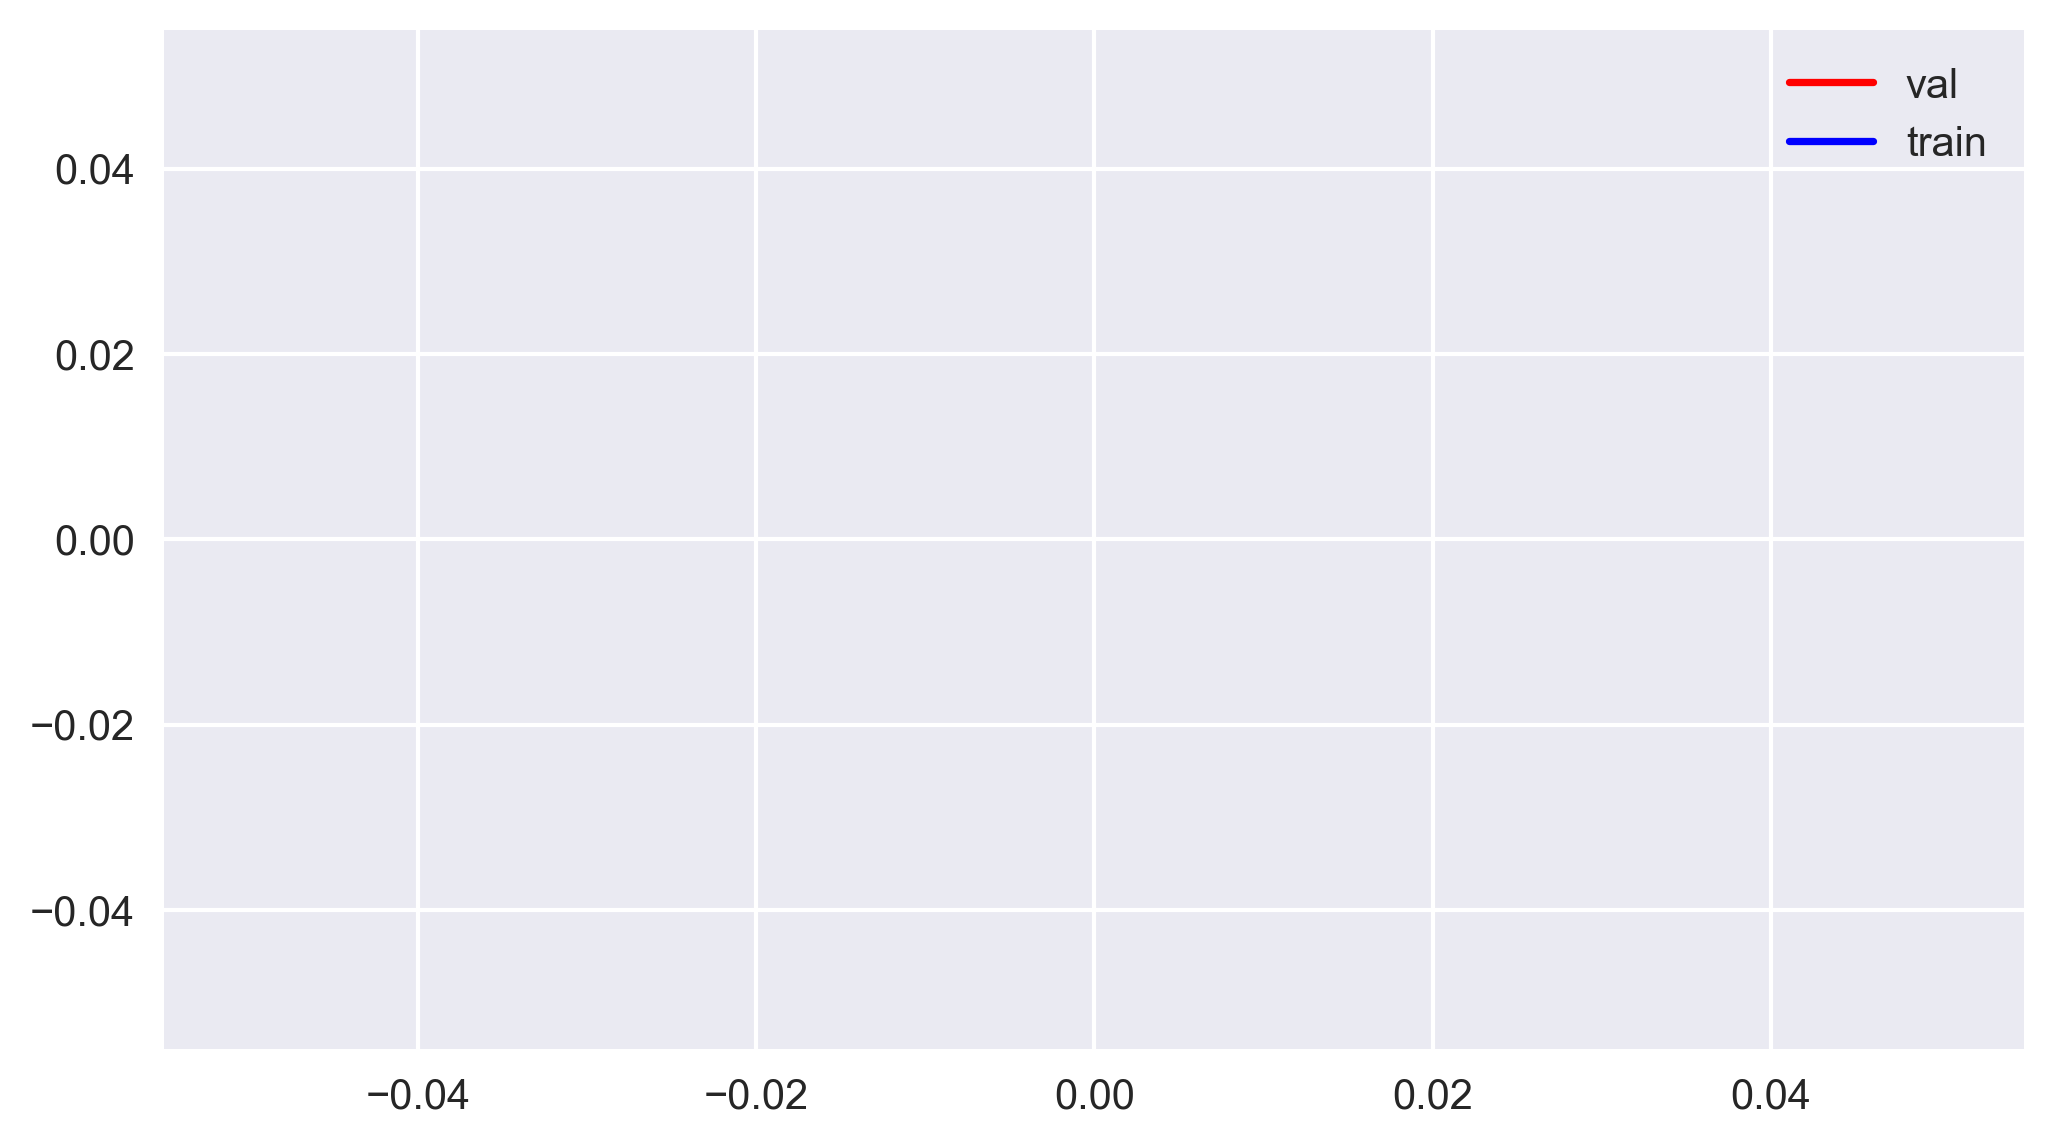

In [45]:
plt.plot(np.arange(len(val_loss)), val_loss, c="red", label='val')
plt.plot(np.arange(len(train_loss)), train_loss, c='blue', label ='train')
plt.legend()
plt.show()

# 예측 결과 시각화
- https://www.youtube.com/watch?v=LLLVYkXJw30

In [46]:
# X_test_1st[:5]

In [47]:
pred = model_118.predict(X_test_1st)

In [48]:
pred[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [49]:
np.mean(pred)

nan

In [50]:
score_rmse = np.sqrt(np.min(pred))
score_rmse

nan

In [51]:
y_test_1st[:5]

array([0.32950686, 0.3027112 , 0.30502745, 0.31838046, 0.31802135])

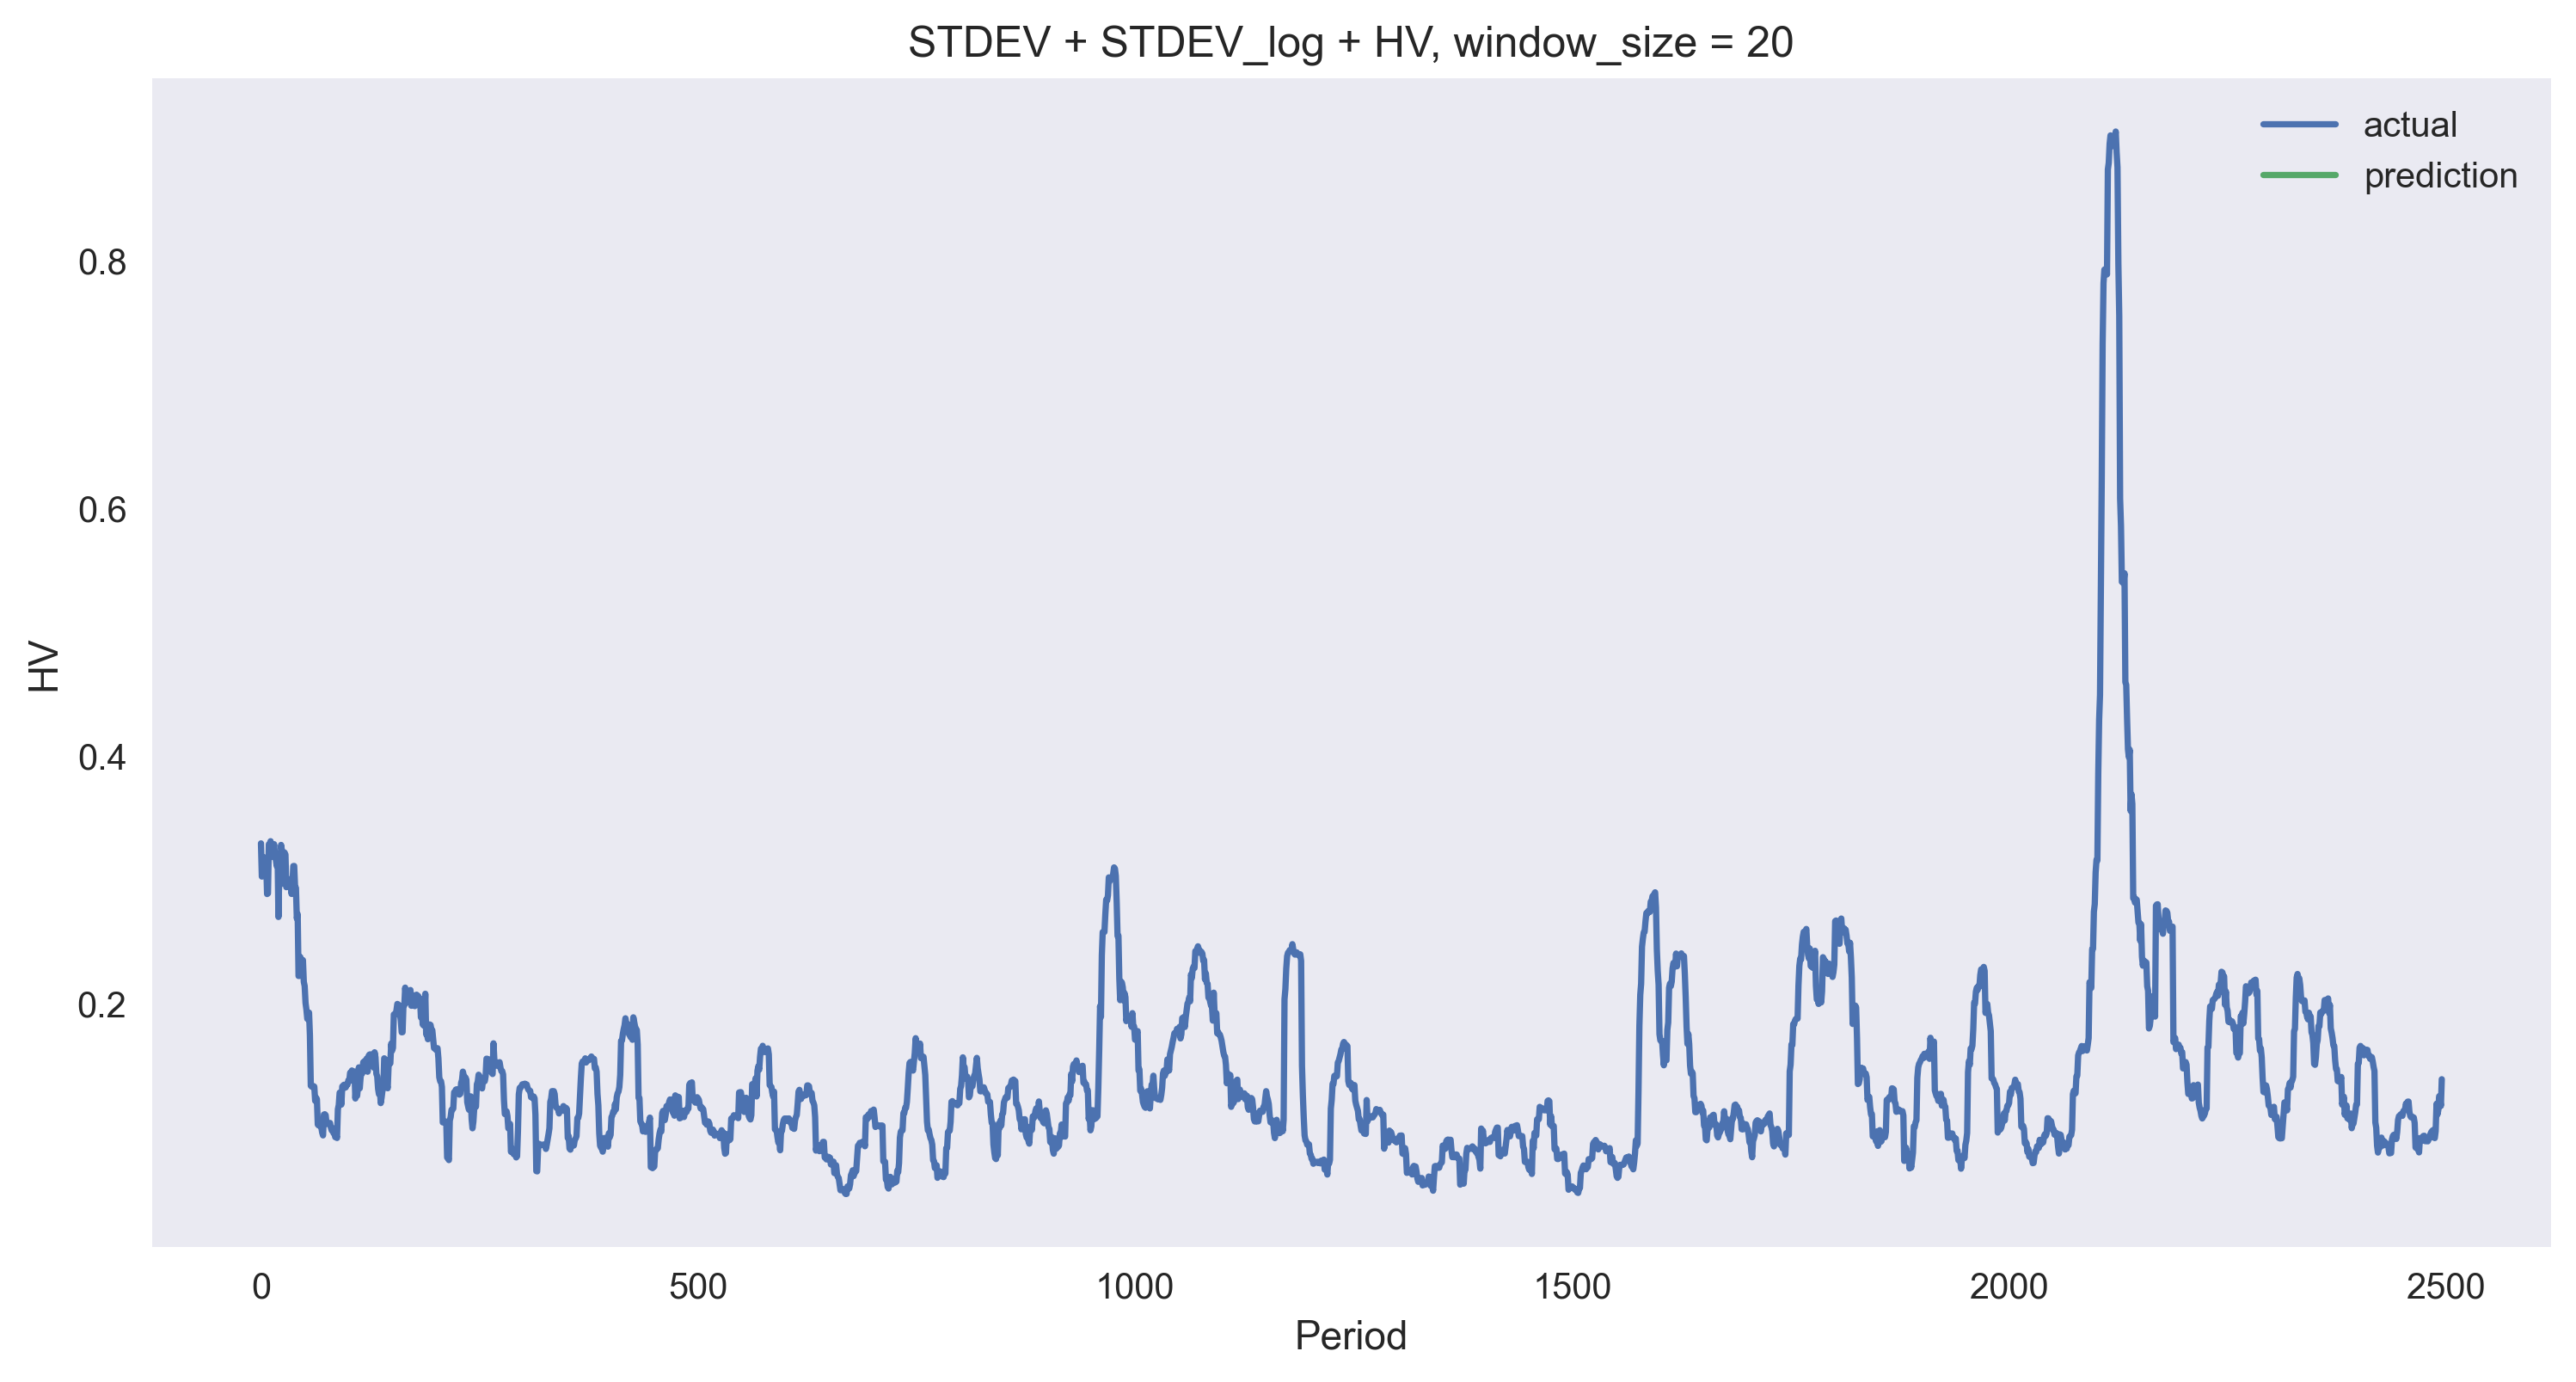

In [52]:
plt.figure(figsize = (12,6))
plt.title('STDEV + STDEV_log + HV, window_size = 20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()